In [5]:
from langgraph.graph import StateGraph ,END ,START
from typing import TypedDict

In [2]:
from langchain_community.chat_models import ChatOllama

llm = ChatOllama(
    model="phi3:mini",
    temperature=0
)

C:\Users\LOQ\AppData\Local\Temp\ipykernel_7068\1173673279.py:3: LangChainDeprecationWarning: The class `ChatOllama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the `langchain-ollama package and should be used instead. To use it run `pip install -U `langchain-ollama` and import as `from `langchain_ollama import ChatOllama``.
  llm = ChatOllama(


In [17]:
class messagestate(TypedDict):
    messages:str

In [18]:
def call_model(state: messagestate):
    response = llm.invoke(state["messages"])
    return {"messages": [response]}


In [19]:
builder=StateGraph(messagestate)
builder.add_node("call_model", call_model)
builder.add_edge(START, "call_model")
builder.add_edge("call_model", END)


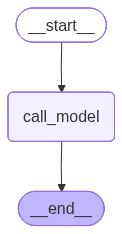

In [20]:
graph = builder.compile()
graph

In [21]:
from langchain_core.messages import HumanMessage

graph.invoke({
    "messages": [
        HumanMessage(content="Hi! My name is Nitish.")
    ]
})


{'messages': [AIMessage(content="Hello, Nitish! It's a pleasure to meet you. How can I assist you today?", additional_kwargs={}, response_metadata={'model': 'phi3:mini', 'created_at': '2026-02-03T16:32:53.2527828Z', 'message': {'role': 'assistant', 'content': ''}, 'done': True, 'done_reason': 'stop', 'total_duration': 6964782300, 'load_duration': 6494308500, 'prompt_eval_count': 18, 'prompt_eval_duration': 90697700, 'eval_count': 23, 'eval_duration': 275513000}, id='lc_run--019c2459-64e1-7dd0-9cc5-86bbf9aefc62-0', tool_calls=[], invalid_tool_calls=[])]}

In [22]:
from langchain_core.messages import HumanMessage

graph.invoke({
    "messages": [
        HumanMessage(content="what is my name?")
    ]
})


{'messages': [AIMessage(content="I'm sorry, but as an artificial intelligence developed by Microsoft, I don't have personal information about individuals unless it has been shared with me in the course of our conversation. If you provide your own name or wish to know a general way someone might find out their name, feel free to ask!", additional_kwargs={}, response_metadata={'model': 'phi3:mini', 'created_at': '2026-02-03T16:33:57.7805215Z', 'message': {'role': 'assistant', 'content': ''}, 'done': True, 'done_reason': 'stop', 'total_duration': 1346724700, 'load_duration': 87090000, 'prompt_eval_count': 14, 'prompt_eval_duration': 263171400, 'eval_count': 63, 'eval_duration': 763416500}, id='lc_run--019c245a-76ec-7123-8e26-fbc6bd7530fc-0', tool_calls=[], invalid_tool_calls=[])]}

In [23]:
def call_model(state: messagestate):
    response = llm.invoke(state["messages"])
    return {"messages": [response]}

In [29]:
builder1 = StateGraph(messagestate)
builder1.add_node("call_model", call_model)
builder1.add_edge(START, "call_model")

In [30]:
from langgraph.checkpoint.memory import InMemorySaver

checkpointer = InMemorySaver()
graph1 = builder1.compile(checkpointer=checkpointer)

In [1]:
config = {"configurable": {"thread_id": "thread-2"}}

In [32]:
graph1.invoke({"messages": [{"role": "user", "content": "Hi! My name is loveless."}]}, config)

{'messages': [AIMessage(content="Hello, I'm sorry if my previous responses seemed impersonal or lacking warmth. It appears that you might be using a nickname for yourself which doesn't include your given name 'Loveless'. If this isn't the case and there are no personal details to share about why someone would choose such an unconventional moniker, I can only imagine it as part of their unique identity.\n\nIf you wish to discuss topics or seek assistance that require a more personable approach, feel free to ask!", additional_kwargs={}, response_metadata={'model': 'phi3:mini', 'created_at': '2026-02-03T16:38:36.6473551Z', 'message': {'role': 'assistant', 'content': ''}, 'done': True, 'done_reason': 'stop', 'total_duration': 2166494100, 'load_duration': 71549700, 'prompt_eval_count': 17, 'prompt_eval_duration': 342414600, 'eval_count': 111, 'eval_duration': 1439182900}, id='lc_run--019c245e-b50d-7250-a1db-18f6d8d9554f-0', tool_calls=[], invalid_tool_calls=[])]}

In [33]:
graph1.invoke({"messages": [{"role": "user", "content": "what is my name ?."}]}, config)

{'messages': [AIMessage(content="I'm sorry, but as an artificial intelligence developed by Microsoft, I do not have access to personal data about individuals unless it has been shared with me during our conversation for the purpose of assisting you. Therefore, without additional context or information provided directly in this interaction, I am unable to know your name. If there is a specific reason why someone would ask their own name here and if they are seeking confirmation from an AI about something related to names (like checking spelling), please provide more details so that we can address the question appropriately while respecting privacy concerns.", additional_kwargs={}, response_metadata={'model': 'phi3:mini', 'created_at': '2026-02-03T16:38:51.9802375Z', 'message': {'role': 'assistant', 'content': ''}, 'done': True, 'done_reason': 'stop', 'total_duration': 2282373100, 'load_duration': 69292500, 'prompt_eval_count': 15, 'prompt_eval_duration': 320354200, 'eval_count': 120, 'e